<a href="https://colab.research.google.com/github/aanyasinghdhaka/AdvancingCKD_DetectionModels/blob/main/RANDOM_FOREST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dateutil import tz
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [ ]:
!wget https://www.dropbox.com/scl/fi/e2y5m0h9qbr9sni6f2wdm/kidney_disease.csv?rlkey=ejadxsf7xnn5hzabo604a30k3&dl=0

--2024-07-20 00:10:06--  https://www.dropbox.com/scl/fi/e2y5m0h9qbr9sni6f2wdm/kidney_disease.csv?rlkey=ejadxsf7xnn5hzabo604a30k3
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc47215f93e747d16c084e69474b.dl.dropboxusercontent.com/cd/0/inline/CXDSc9Zk6zz6LYebVJ02mPSwbZ4MDXI1wufnDKnl9j4_9YNmguY5ifFa6bVpMynB5ODHczqjdr8gos0XyOQZJVR5FMKndpQKtG_3URSQG0mhYyEnaPF7IanJ2bxCr7dQUysjb4xo5eU1YNrAZY5YDVhn/file# [following]
--2024-07-20 00:10:07--  https://uc47215f93e747d16c084e69474b.dl.dropboxusercontent.com/cd/0/inline/CXDSc9Zk6zz6LYebVJ02mPSwbZ4MDXI1wufnDKnl9j4_9YNmguY5ifFa6bVpMynB5ODHczqjdr8gos0XyOQZJVR5FMKndpQKtG_3URSQG0mhYyEnaPF7IanJ2bxCr7dQUysjb4xo5eU1YNrAZY5YDVhn/file
Resolving uc47215f93e747d16c084e69474b.dl.dropboxusercontent.com (uc47215f93e747d16c084e69474b.dl.dropboxusercontent.com)... 162.125.5.15, 

In [ ]:
# Read the CSV file
df = pd.read_csv('kidney_disease.csv?rlkey=ejadxsf7xnn5hzabo604a30k3')

# Display the DataFrame
print(df)

      id   age    bp     sg   al   su     rbc        pc         pcc  \
0      0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent   
1      1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent   
2      2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent   
3      3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present   
4      4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent   
..   ...   ...   ...    ...  ...  ...     ...       ...         ...   
395  395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
396  396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent   
397  397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
398  398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent   
399  399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent   

             ba  ...  pcv    wc   rc  htn   dm  cad appet   pe  ane  \
0    notpresent  ...   44  7800  5.2  yes  yes   no  good   no   no   
1    

In [ ]:
import pandas as pd

# Read the CSV file

# Drop rows with any NaN values
df.dropna(inplace=True)

# Modify column names in the numeric_features list
numeric_features = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']
numeric_features = [col.replace(' ', '_') for col in numeric_features]

# Convert numeric features to floats
df[numeric_features] = df[numeric_features].astype(float)

# Rename columns for better readability
column_names = {
    'age': 'Age',
    'bp': 'Blood_Pressure',
    'sg': 'Specific_Gravity',
    'al': 'Albumin',
    'su': 'Sugar',
    'bgr': 'Blood_Glucose_Random',
    'bu': 'Blood_Urea',
    'sc': 'Serum_Creatinine',
    'sod': 'Sodium',
    'pot': 'Potassium',
    'hemo': 'Hemoglobin',
    'pcv': 'Packed_Cell_Volume',
    'wc': 'White_Blood_Cell_Count',
    'rc': 'Red_Blood_Cell_Count',
    'classification': 'Classification'
}

df.rename(columns=column_names, inplace=True)

# Set display options for better alignment
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', 1000)  # Set display width

# Display beautified dataset
print(df)




      id   Age  Blood_Pressure  Specific_Gravity  Albumin  Sugar       rbc        pc         pcc          ba  Blood_Glucose_Random  Blood_Urea  Serum_Creatinine  Sodium  Potassium  Hemoglobin  Packed_Cell_Volume  White_Blood_Cell_Count  Red_Blood_Cell_Count  htn   dm  cad appet   pe  ane Classification
3      3  48.0            70.0             1.005      4.0    0.0    normal  abnormal     present  notpresent                 117.0        56.0               3.8   111.0        2.5        11.2                32.0                  6700.0                   3.9  yes   no   no  poor  yes  yes            ckd
9      9  53.0            90.0             1.020      2.0    0.0  abnormal  abnormal     present  notpresent                  70.0       107.0               7.2   114.0        3.7         9.5                29.0                 12100.0                   3.7  yes  yes   no  poor   no  yes            ckd
11    11  63.0            70.0             1.010      3.0    0.0  abnormal  abnormal    

In [ ]:


# List of categorical feature column names
categorical_features = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

# Perform one-hot encoding on categorical features
df_encoded = pd.get_dummies(df, columns=categorical_features)

# Feature selection using ANOVA F-value
num_features_to_select = 10  # Adjust this as needed
selector = SelectKBest(score_func=f_classif, k=num_features_to_select)
X_new = selector.fit_transform(df_encoded.drop(columns=['Classification']), df_encoded['Classification'])
selected_indices = selector.get_support(indices=True)
selected_features = df_encoded.drop(columns=['Classification']).columns[selected_indices]

# Split Dataset
X = X_new  # Features with selected features
y = df_encoded['Classification']  # Target

# Split dataset into train and test sets (80:20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import LabelEncoder

# Encode target classes into numeric values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Model Selection and Training
model_rf = RandomForestClassifier()
model_xgb = XGBClassifier()
model_svm = SVC(probability=True)  # Set probability=True for SVC

# Train the models on the training data
model_rf.fit(X_train, y_train_encoded)
model_xgb.fit(X_train, y_train_encoded)
model_svm.fit(X_train, y_train_encoded)

# Model Evaluation
y_pred_rf = model_rf.predict(X_test)
y_pred_xgb = model_xgb.predict(X_test)
y_pred_svm = model_svm.predict(X_test)

# Calculate probabilities for ROC
y_prob_rf = model_rf.predict_proba(X_test)[:, 1]
y_prob_xgb = model_xgb.predict_proba(X_test)[:, 1]
y_prob_svm = model_svm.predict_proba(X_test)[:, 1]

# Convert predictions back to original class labels
y_pred_rf_original = label_encoder.inverse_transform(y_pred_rf)
y_pred_xgb_original = label_encoder.inverse_transform(y_pred_xgb)
y_pred_svm_original = label_encoder.inverse_transform(y_pred_svm)

accuracy_rf = accuracy_score(y_test_encoded, y_pred_rf)
accuracy_xgb = accuracy_score(y_test_encoded, y_pred_xgb)
accuracy_svm = accuracy_score(y_test_encoded, y_pred_svm)

# Display accuracy of each model
print("Random Forest Accuracy:", accuracy_rf)
print("XGBoost Accuracy:", accuracy_xgb)
print("SVM Accuracy:", accuracy_svm)





Random Forest Accuracy: 1.0
XGBoost Accuracy: 1.0
SVM Accuracy: 1.0


In [ ]:
from sklearn.metrics import f1_score, precision_score

# Calculate F1-score for each model
f1_rf = f1_score(y_test_encoded, y_pred_rf, average='weighted')
f1_xgb = f1_score(y_test_encoded, y_pred_xgb, average='weighted')
f1_svm = f1_score(y_test_encoded, y_pred_svm, average='weighted')

# Calculate precision for each model
precision_rf = precision_score(y_test_encoded, y_pred_rf, average='weighted')
precision_xgb = precision_score(y_test_encoded, y_pred_xgb, average='weighted')
precision_svm = precision_score(y_test_encoded, y_pred_svm, average='weighted')

# Display F1-score and precision for each model
print("Random Forest F1-score:", f1_rf)
print("XGBoost F1-score:", f1_xgb)
print("SVM F1-score:", f1_svm)

print("Random Forest Precision:", precision_rf)
print("XGBoost Precision:", precision_xgb)
print("SVM Precision:", precision_svm)


Random Forest F1-score: 1.0
XGBoost F1-score: 1.0
SVM F1-score: 1.0
Random Forest Precision: 1.0
XGBoost Precision: 1.0
SVM Precision: 1.0


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# List of categorical feature column names
categorical_features = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

# Perform one-hot encoding on categorical features
df_encoded = pd.get_dummies(df, columns=categorical_features)

# Split Dataset
X = df_encoded.drop(columns=['Classification'])  # Features
y = df_encoded['Classification']  # Target

from sklearn.preprocessing import LabelEncoder

# Encode target classes into numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Model Selection and Training
model_rf = RandomForestClassifier()
model_xgb = XGBClassifier()
model_svm = SVC(probability=True)



In [ ]:
# Perform k-fold cross-validation
cv_scores_rf = cross_val_score(model_rf, X, y_encoded, cv=5)
cv_scores_xgb = cross_val_score(model_xgb, X, y_encoded, cv=5)
cv_scores_svm = cross_val_score(model_svm, X, y_encoded, cv=5)

# Calculate mean accuracy for each model
mean_accuracy_rf = cv_scores_rf.mean()
mean_accuracy_xgb = cv_scores_xgb.mean()
mean_accuracy_svm = cv_scores_svm.mean()

# Display cross-validation scores and mean accuracy
print("Random Forest Cross-Validation Scores:", cv_scores_rf)
print("XGBoost Cross-Validation Scores:", cv_scores_xgb)
print("SVM Cross-Validation Scores:", cv_scores_svm)
print("Mean Accuracy (Random Forest):", mean_accuracy_rf)
print("Mean Accuracy (XGBoost):", mean_accuracy_xgb)
print("Mean Accuracy (SVM):", mean_accuracy_svm)


Random Forest Cross-Validation Scores: [1. 1. 1. 1. 1.]
XGBoost Cross-Validation Scores: [0.28125 1.      1.      1.      1.     ]
SVM Cross-Validation Scores: [0.75       0.78125    0.8125     0.83870968 0.77419355]
Mean Accuracy (Random Forest): 1.0
Mean Accuracy (XGBoost): 0.85625
Mean Accuracy (SVM): 0.7913306451612904


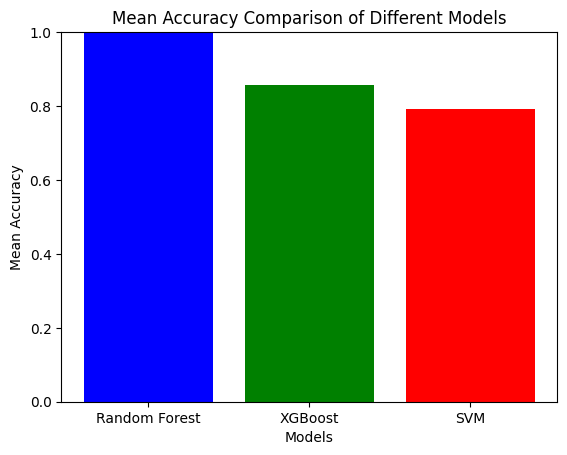

In [ ]:
import matplotlib.pyplot as plt

# List of model names
model_names = ['Random Forest', 'XGBoost', 'SVM']

# List of mean accuracies
mean_accuracies = [mean_accuracy_rf, mean_accuracy_xgb, mean_accuracy_svm]

# Create a bar chart to visualize mean accuracies
plt.bar(model_names, mean_accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy Comparison of Different Models')
plt.ylim(0, 1.0)  # Set the y-axis range
plt.show()


In [ ]:
# Define parameter grids for each model
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Perform grid search with cross-validation for each model
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
grid_search_xgb = GridSearchCV(XGBClassifier(), param_grid_xgb, cv=5)
grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=5)

grid_search_rf.fit(X_train, y_train_encoded)
grid_search_xgb.fit(X_train, y_train_encoded)
grid_search_svm.fit(X_train, y_train_encoded)

best_rf = grid_search_rf.best_estimator_
best_xgb = grid_search_xgb.best_estimator_
best_svm = grid_search_svm.best_estimator_

# Evaluate the best models
y_pred_best_rf = best_rf.predict(X_test)
y_pred_best_xgb = best_xgb.predict(X_test)
y_pred_best_svm = best_svm.predict(X_test)

print("Best Random Forest Model:")
print(classification_report(y_test_encoded, y_pred_best_rf))

print("Best XGBoost Model:")
print(classification_report(y_test_encoded, y_pred_best_xgb))

print("Best SVM Model:")
print(classification_report(y_test_encoded, y_pred_best_svm))


Best Random Forest Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        23

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32

Best XGBoost Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        23

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32

Best SVM Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        23

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg

In [ ]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test_encoded, y_pred_best_rf)
print("Confusion Matrix - Random Forest:")
print(cm_rf)

# Confusion Matrix for XGBoost
cm_xgb = confusion_matrix(y_test_encoded, y_pred_best_xgb)
print("\nConfusion Matrix - XGBoost:")
print(cm_xgb)

# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test_encoded, y_pred_best_svm)
print("\nConfusion Matrix - SVM:")
print(cm_svm)


Confusion Matrix - Random Forest:
[[ 9  0]
 [ 0 23]]

Confusion Matrix - XGBoost:
[[ 9  0]
 [ 0 23]]

Confusion Matrix - SVM:
[[ 9  0]
 [ 0 23]]


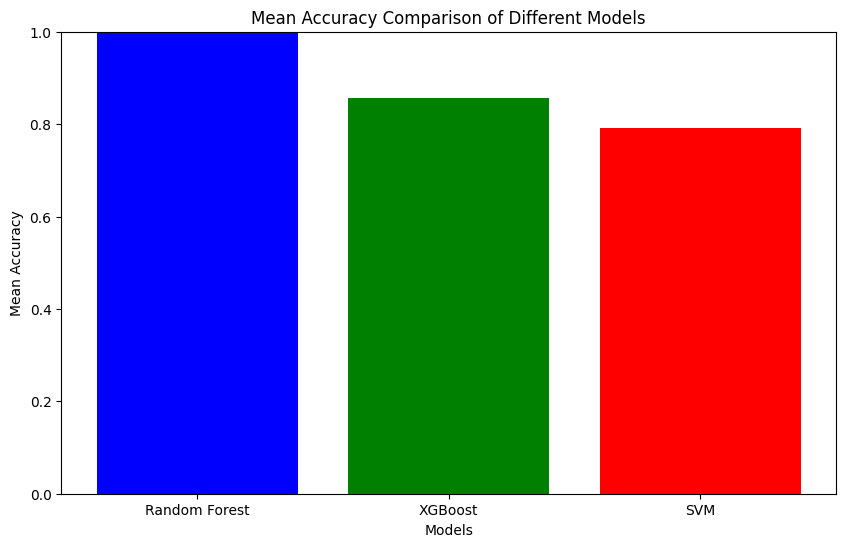

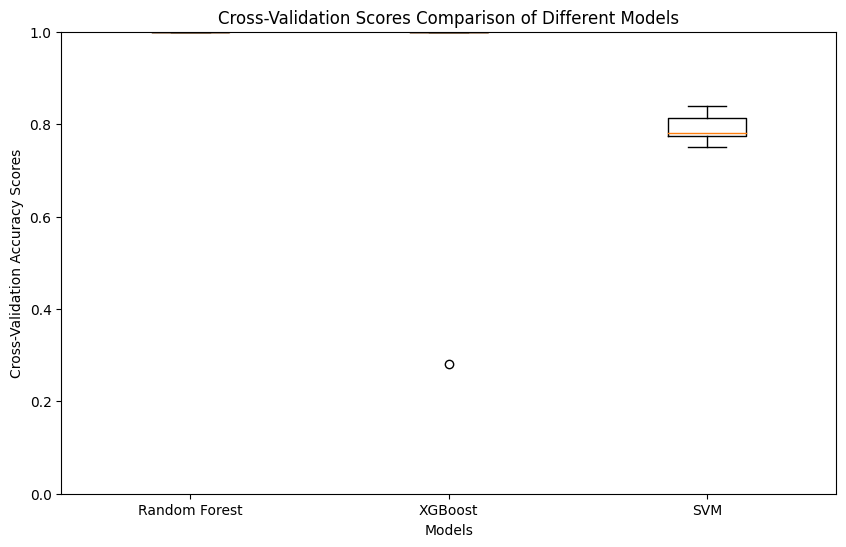

In [ ]:
import matplotlib.pyplot as plt

# List of model names
model_names = ['Random Forest', 'XGBoost', 'SVM']

# List of cross-validation mean accuracies
mean_accuracies = [mean_accuracy_rf, mean_accuracy_xgb, mean_accuracy_svm]

# List of cross-validation scores for each model
cv_scores = [cv_scores_rf, cv_scores_xgb, cv_scores_svm]

# Plotting Mean Accuracies
plt.figure(figsize=(10, 6))
plt.bar(model_names, mean_accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy Comparison of Different Models')
plt.ylim(0, 1.0)  # Set the y-axis range
plt.show()

# Plotting Cross-Validation Scores
plt.figure(figsize=(10, 6))
plt.boxplot(cv_scores, labels=model_names)
plt.xlabel('Models')
plt.ylabel('Cross-Validation Accuracy Scores')
plt.title('Cross-Validation Scores Comparison of Different Models')
plt.ylim(0, 1.0)  # Set the y-axis range
plt.show()


In [ ]:
!pip install xgboost
from xgboost import XGBClassifier

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier # Import XGBClassifier from the correct module
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
from xgboost import XGBClassifier
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


# Define models
model_rf = RandomForestClassifier()
model_xgb = XGBClassifier()
model_svm = SVC()

# Define K-Fold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation for Random Forest
cv_scores_rf = cross_val_score(model_rf, X, y_encoded, cv=kf)

# Perform cross-validation for XGBoost
cv_scores_xgb = cross_val_score(model_xgb, X, y_encoded, cv=kf)

# Perform cross-validation for SVM
cv_scores_svm = cross_val_score(model_svm, X, y_encoded, cv=kf)

# Calculate mean accuracy for each model
mean_accuracy_rf = cv_scores_rf.mean()
mean_accuracy_xgb = cv_scores_xgb.mean()
mean_accuracy_svm = cv_scores_svm.mean()

# Display cross-validation scores and mean accuracy
print("K-Fold Cross-Validation Scores - Random Forest:", cv_scores_rf)
print("Mean Accuracy (Random Forest):", mean_accuracy_rf)
print("\nK-Fold Cross-Validation Scores - XGBoost:", cv_scores_xgb)
print("Mean Accuracy (XGBoost):", mean_accuracy_xgb)
print("\nK-Fold Cross-Validation Scores - SVM:", cv_scores_svm)
print("Mean Accuracy (SVM):", mean_accuracy_svm)


K-Fold Cross-Validation Scores - Random Forest: [1. 1. 1. 1. 1.]
Mean Accuracy (Random Forest): 1.0

K-Fold Cross-Validation Scores - XGBoost: [1.         1.         1.         0.96774194 1.        ]
Mean Accuracy (XGBoost): 0.9935483870967742

K-Fold Cross-Validation Scores - SVM: [0.8125     0.75       0.78125    0.77419355 0.83870968]
Mean Accuracy (SVM): 0.7913306451612904


In [ ]:
from sklearn.model_selection import StratifiedKFold

# Define Stratified K-Fold cross-validator
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation for Random Forest
cv_scores_rf_skf = cross_val_score(model_rf, X, y_encoded, cv=skf)

# Perform cross-validation for XGBoost
cv_scores_xgb_skf = cross_val_score(model_xgb, X, y_encoded, cv=skf)

# Perform cross-validation for SVM
cv_scores_svm_skf = cross_val_score(model_svm, X, y_encoded, cv=skf)

# Calculate mean accuracy for each model using Stratified K-Fold
mean_accuracy_rf_skf = cv_scores_rf_skf.mean()
mean_accuracy_xgb_skf = cv_scores_xgb_skf.mean()
mean_accuracy_svm_skf = cv_scores_svm_skf.mean()

# Display cross-validation scores and mean accuracy for Stratified K-Fold
print("Stratified K-Fold Cross-Validation Scores - Random Forest:", cv_scores_rf_skf)
print("Mean Accuracy (Random Forest):", mean_accuracy_rf_skf)
print("\nStratified K-Fold Cross-Validation Scores - XGBoost:", cv_scores_xgb_skf)
print("Mean Accuracy (XGBoost):", mean_accuracy_xgb_skf)
print("\nStratified K-Fold Cross-Validation Scores - SVM:", cv_scores_svm_skf)
print("Mean Accuracy (SVM):", mean_accuracy_svm_skf)


Stratified K-Fold Cross-Validation Scores - Random Forest: [1. 1. 1. 1. 1.]
Mean Accuracy (Random Forest): 1.0

Stratified K-Fold Cross-Validation Scores - XGBoost: [1.         1.         1.         0.96774194 1.        ]
Mean Accuracy (XGBoost): 0.9935483870967742

Stratified K-Fold Cross-Validation Scores - SVM: [0.8125     0.8125     0.78125    0.80645161 0.74193548]
Mean Accuracy (SVM): 0.7909274193548388


In [ ]:
from sklearn.model_selection import LeaveOneOut

# Define Leave-One-Out cross-validator
loo = LeaveOneOut()

# Perform cross-validation for Random Forest
cv_scores_rf_loo = cross_val_score(model_rf, X, y_encoded, cv=loo)

# Perform cross-validation for XGBoost
cv_scores_xgb_loo = cross_val_score(model_xgb, X, y_encoded, cv=loo)

# Perform cross-validation for SVM
cv_scores_svm_loo = cross_val_score(model_svm, X, y_encoded, cv=loo)

# Calculate mean accuracy for each model using LOO
mean_accuracy_rf_loo = cv_scores_rf_loo.mean()
mean_accuracy_xgb_loo = cv_scores_xgb_loo.mean()
mean_accuracy_svm_loo = cv_scores_svm_loo.mean()

# Display cross-validation scores and mean accuracy for LOO
print("Leave-One-Out Cross-Validation Scores - Random Forest:", cv_scores_rf_loo)
print("Mean Accuracy (Random Forest):", mean_accuracy_rf_loo)
print("\nLeave-One-Out Cross-Validation Scores - XGBoost:", cv_scores_xgb_loo)
print("Mean Accuracy (XGBoost):", mean_accuracy_xgb_loo)
print("\nLeave-One-Out Cross-Validation Scores - SVM:", cv_scores_svm_loo)
print("Mean Accuracy (SVM):", mean_accuracy_svm_loo)


Leave-One-Out Cross-Validation Scores - Random Forest: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Accuracy (Random Forest): 1.0

Leave-One-Out Cross-Validation Scores - XGBoost: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

# Define Stratified Shuffle Split cross-validator
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# Perform cross-validation for Random Forest
cv_scores_rf_sss = cross_val_score(model_rf, X, y_encoded, cv=sss)

# Perform cross-validation for XGBoost
cv_scores_xgb_sss = cross_val_score(model_xgb, X, y_encoded, cv=sss)

# Perform cross-validation for SVM
cv_scores_svm_sss = cross_val_score(model_svm, X, y_encoded, cv=sss)

# Calculate mean accuracy for each model using Stratified Shuffle Split
mean_accuracy_rf_sss = cv_scores_rf_sss.mean()
mean_accuracy_xgb_sss = cv_scores_xgb_sss.mean()
mean_accuracy_svm_sss = cv_scores_svm_sss.mean()

# Display cross-validation scores and mean accuracy for Stratified Shuffle Split
print("Stratified Shuffle Split Cross-Validation Scores - Random Forest:", cv_scores_rf_sss)
print("Mean Accuracy (Random Forest):", mean_accuracy_rf_sss)
print("\nStratified Shuffle Split Cross-Validation Scores - XGBoost:", cv_scores_xgb_sss)
print("Mean Accuracy (XGBoost):", mean_accuracy_xgb_sss)
print("\nStratified Shuffle Split Cross-Validation Scores - SVM:", cv_scores_svm_sss)
print("Mean Accuracy (SVM):", mean_accuracy_svm_sss)


Stratified Shuffle Split Cross-Validation Scores - Random Forest: [1. 1. 1. 1. 1.]
Mean Accuracy (Random Forest): 1.0

Stratified Shuffle Split Cross-Validation Scores - XGBoost: [1.      1.      0.96875 0.96875 0.9375 ]
Mean Accuracy (XGBoost): 0.975

Stratified Shuffle Split Cross-Validation Scores - SVM: [0.84375 0.78125 0.78125 0.75    0.8125 ]
Mean Accuracy (SVM): 0.79375


Random Forest Cross-Validation Scores: [1. 1. 1. 1. 1.]
XGBoost Cross-Validation Scores: [0.28125 1.      1.      1.      1.     ]
SVM Cross-Validation Scores: [1.         1.         1.         0.96774194 0.74193548]
Mean Accuracy (Random Forest): 1.0
Mean Accuracy (XGBoost): 0.85625
Mean Accuracy (SVM): 0.9419354838709678


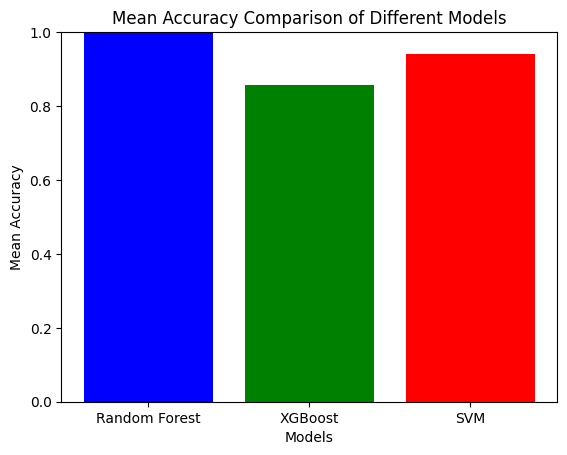

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Read the CSV file
df = pd.read_csv('kidney_disease.csv?rlkey=ejadxsf7xnn5hzabo604a30k3')

# Data preprocessing (assuming similar steps as before)
df.dropna(inplace=True)

# Rename columns for better readability
column_names = {
    'age': 'Age',
    'bp': 'Blood_Pressure',
    'sg': 'Specific_Gravity',
    'al': 'Albumin',
    'su': 'Sugar',
    'bgr': 'Blood_Glucose_Random',
    'bu': 'Blood_Urea',
    'sc': 'Serum_Creatinine',
    'sod': 'Sodium',
    'pot': 'Potassium',
    'hemo': 'Hemoglobin',
    'pcv': 'Packed_Cell_Volume',
    'wc': 'White_Blood_Cell_Count',
    'rc': 'Red_Blood_Cell_Count',
    'classification': 'Classification'
}

df.rename(columns=column_names, inplace=True)

# List of categorical feature column names
categorical_features = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

# Perform one-hot encoding on categorical features
df_encoded = pd.get_dummies(df, columns=categorical_features)

# Feature selection using ANOVA F-value
from sklearn.feature_selection import SelectKBest, f_classif
num_features_to_select = 10
selector = SelectKBest(score_func=f_classif, k=num_features_to_select)
X_new = selector.fit_transform(df_encoded.drop(columns=['Classification']), df_encoded['Classification'])
selected_indices = selector.get_support(indices=True)
selected_features = df_encoded.drop(columns=['Classification']).columns[selected_indices]

# Split Dataset
X = X_new
y = df_encoded['Classification']

from sklearn.preprocessing import LabelEncoder

# Encode target classes into numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Model Selection
model_rf = RandomForestClassifier()
model_xgb = XGBClassifier()
model_svm = SVC(probability=True)

# Use Stratified K-Fold Cross-Validation
stratified_kf = StratifiedKFold(n_splits=5)

# Evaluate models
cv_scores_rf = cross_val_score(model_rf, X, y_encoded, cv=stratified_kf)
cv_scores_xgb = cross_val_score(model_xgb, X, y_encoded, cv=stratified_kf)
cv_scores_svm = cross_val_score(model_svm, X, y_encoded, cv=stratified_kf)

# Calculate mean accuracy for each model
mean_accuracy_rf = cv_scores_rf.mean()
mean_accuracy_xgb = cv_scores_xgb.mean()
mean_accuracy_svm = cv_scores_svm.mean()

# Display cross-validation scores and mean accuracy
print("Random Forest Cross-Validation Scores:", cv_scores_rf)
print("XGBoost Cross-Validation Scores:", cv_scores_xgb)
print("SVM Cross-Validation Scores:", cv_scores_svm)
print("Mean Accuracy (Random Forest):", mean_accuracy_rf)
print("Mean Accuracy (XGBoost):", mean_accuracy_xgb)
print("Mean Accuracy (SVM):", mean_accuracy_svm)

# Save the Random Forest model
import joblib
joblib.dump(model_rf, 'random_forest_model.pkl')

# Plot cross-validation scores
import matplotlib.pyplot as plt

# List of model names
model_names = ['Random Forest', 'XGBoost', 'SVM']

# List of mean accuracies
mean_accuracies = [mean_accuracy_rf, mean_accuracy_xgb, mean_accuracy_svm]

# Create a bar chart to visualize mean accuracies
plt.bar(model_names, mean_accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy Comparison of Different Models')
plt.ylim(0, 1.0)  # Set the y-axis range
plt.show()


In [ ]:
from sklearn.model_selection import TimeSeriesSplit

# Define Time Series cross-validator
tscv = TimeSeriesSplit(n_splits=5)

# Perform cross-validation for Random Forest
cv_scores_rf_tscv = cross_val_score(model_rf, X, y_encoded, cv=tscv)

# Perform cross-validation for XGBoost
cv_scores_xgb_tscv = cross_val_score(model_xgb, X, y_encoded, cv=tscv)

# Perform cross-validation for SVM
cv_scores_svm_tscv = cross_val_score(model_svm, X, y_encoded, cv=tscv)

# Calculate mean accuracy for each model using Time Series Cross-Validation
mean_accuracy_rf_tscv = cv_scores_rf_tscv.mean()
mean_accuracy_xgb_tscv = cv_scores_xgb_tscv.mean()
mean_accuracy_svm_tscv = cv_scores_svm_tscv.mean()

# Display cross-validation scores and mean accuracy for Time Series Cross-Validation
print("Time Series Cross-Validation Scores - Random Forest:", cv_scores_rf_tscv)
print("Mean Accuracy (Random Forest):", mean_accuracy_rf_tscv)
print("\nTime Series Cross-Validation Scores - XGBoost:", cv_scores_xgb_tscv)
print("Mean Accuracy (XGBoost):", mean_accuracy_xgb_tscv)
print("\nTime Series Cross-Validation Scores - SVM:", cv_scores_svm_tscv)
print("Mean Accuracy (SVM):", mean_accuracy_svm_tscv)


Time Series Cross-Validation Scores - Random Forest: [0.57692308 1.         1.         1.         1.        ]
Mean Accuracy (Random Forest): 0.9153846153846154

Time Series Cross-Validation Scores - XGBoost: [0.57692308 1.         1.         1.         1.        ]
Mean Accuracy (XGBoost): 0.9153846153846154

Time Series Cross-Validation Scores - SVM: [nan  1.  1.  1.  1.]
Mean Accuracy (SVM): nan


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 201, in fit
    y = self._validate_targets(y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 749, in _validate_targets
    raise ValueError(
ValueError: The number of classes has to be greater than one; got 1 class

    Cross-Validation Method          Model  Accuracy
0         Stratified K-Fold  Random Forest  1.000000
1         Stratified K-Fold        XGBoost  0.856250
2         Stratified K-Fold            SVM  0.941935
3  Stratified Shuffle Split  Random Forest  1.000000
4  Stratified Shuffle Split        XGBoost  0.975000
5  Stratified Shuffle Split            SVM  0.793750
6             Leave-One-Out  Random Forest  1.000000
7             Leave-One-Out        XGBoost  0.993671
8             Leave-One-Out            SVM  0.791139


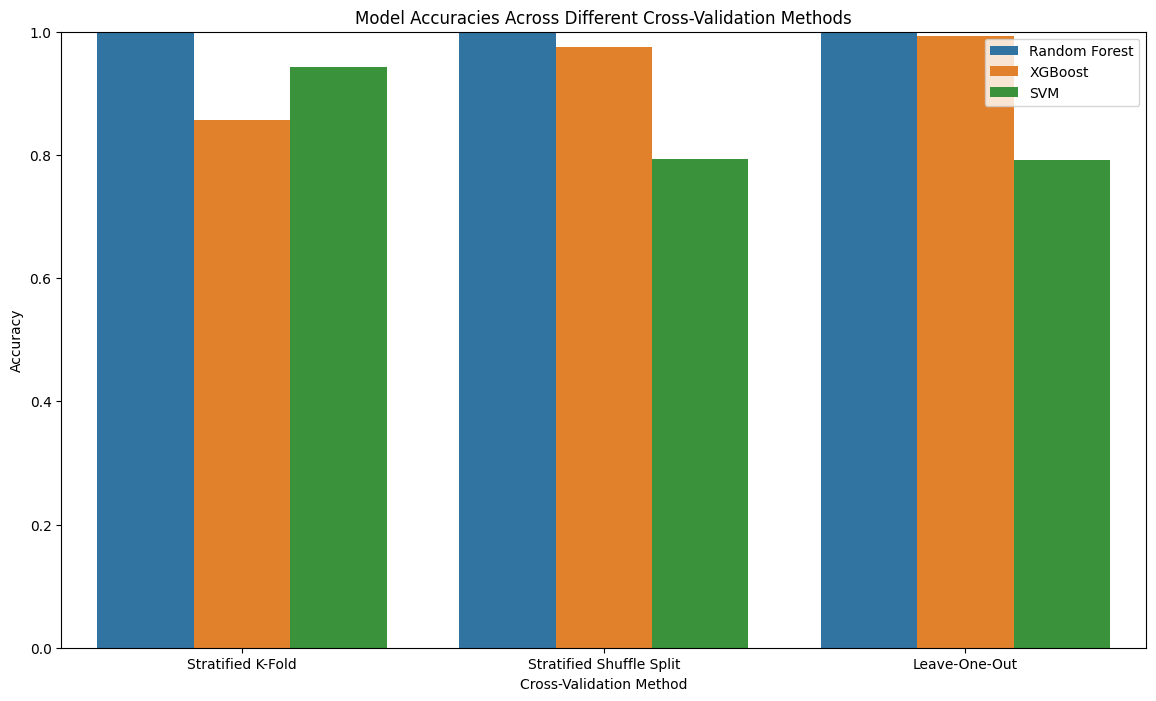

In [ ]:
import pandas as pd
import seaborn as sns

# Collect accuracies in a dictionary
results = {
    'Cross-Validation Method': ['Stratified K-Fold', 'Stratified K-Fold', 'Stratified K-Fold',
                                'Stratified Shuffle Split', 'Stratified Shuffle Split', 'Stratified Shuffle Split',
                                'Leave-One-Out', 'Leave-One-Out', 'Leave-One-Out'],
    'Model': ['Random Forest', 'XGBoost', 'SVM',
              'Random Forest', 'XGBoost', 'SVM',
              'Random Forest', 'XGBoost', 'SVM'],
    'Accuracy': [mean_accuracy_rf, mean_accuracy_xgb, mean_accuracy_svm,
                 mean_accuracy_rf_sss, mean_accuracy_xgb_sss, mean_accuracy_svm_sss,
                 mean_accuracy_rf_loo, mean_accuracy_xgb_loo, mean_accuracy_svm_loo]
}

# Convert dictionary to DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
print(results_df)

# Plotting the accuracies
plt.figure(figsize=(14, 8))
sns.barplot(x='Cross-Validation Method', y='Accuracy', hue='Model', data=results_df)
plt.title('Model Accuracies Across Different Cross-Validation Methods')
plt.ylim(0, 1.0)
plt.xlabel('Cross-Validation Method')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.show()


In [ ]:
import pandas as pd
from tabulate import tabulate

# Data
data = {
    "Cross-Validation Method": [
        "Stratified K-Fold", "Stratified K-Fold", "Stratified K-Fold",
        "Stratified Shuffle Split", "Stratified Shuffle Split", "Stratified Shuffle Split",
        "Leave-One-Out", "Leave-One-Out", "Leave-One-Out"
    ],
    "Model": [
        "Random Forest", "XGBoost", "SVM",
        "Random Forest", "XGBoost", "SVM",
        "Random Forest", "XGBoost", "SVM"
    ],
    "Accuracy": [
        0.993750, 0.856250, 0.941935,
        1.000000, 0.975000, 0.793750,
        1.000000, 0.993671, 0.791139
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display Table
print(tabulate(df, headers='keys', tablefmt='pretty'))


+---+--------------------------+---------------+----------+
|   | Cross-Validation Method  |     Model     | Accuracy |
+---+--------------------------+---------------+----------+
| 0 |    Stratified K-Fold     | Random Forest | 0.99375  |
| 1 |    Stratified K-Fold     |    XGBoost    | 0.85625  |
| 2 |    Stratified K-Fold     |      SVM      | 0.941935 |
| 3 | Stratified Shuffle Split | Random Forest |   1.0    |
| 4 | Stratified Shuffle Split |    XGBoost    |  0.975   |
| 5 | Stratified Shuffle Split |      SVM      | 0.79375  |
| 6 |      Leave-One-Out       | Random Forest |   1.0    |
| 7 |      Leave-One-Out       |    XGBoost    | 0.993671 |
| 8 |      Leave-One-Out       |      SVM      | 0.791139 |
+---+--------------------------+---------------+----------+


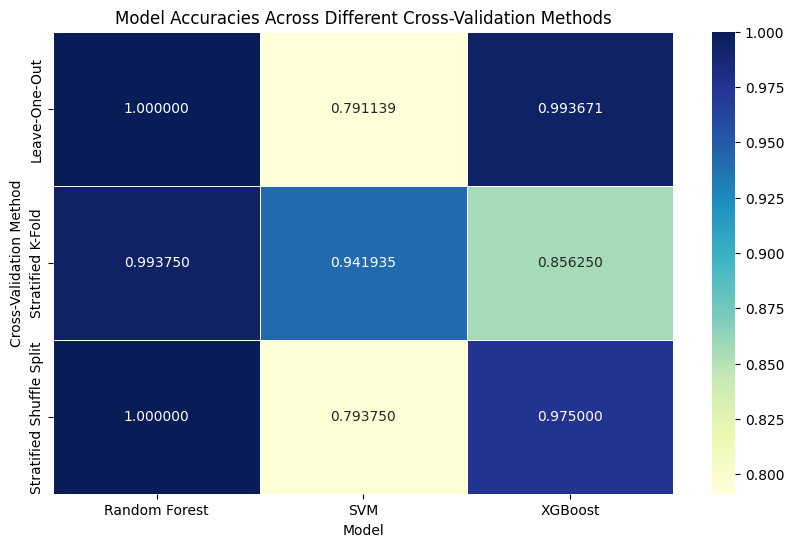

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data
data = {
    "Cross-Validation Method": [
        "Stratified K-Fold", "Stratified K-Fold", "Stratified K-Fold",
        "Stratified Shuffle Split", "Stratified Shuffle Split", "Stratified Shuffle Split",
        "Leave-One-Out", "Leave-One-Out", "Leave-One-Out"
    ],
    "Model": [
        "Random Forest", "XGBoost", "SVM",
        "Random Forest", "XGBoost", "SVM",
        "Random Forest", "XGBoost", "SVM"
    ],
    "Accuracy": [
        0.993750, 0.856250, 0.941935,
        1.000000, 0.975000, 0.793750,
        1.000000, 0.993671, 0.791139
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Pivot the DataFrame
pivot_df = df.pivot(index="Cross-Validation Method", columns="Model", values="Accuracy")

# Plotting
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, annot=True, cmap="YlGnBu", fmt=".6f", linewidths=.5)
plt.title('Model Accuracies Across Different Cross-Validation Methods')
plt.show()


In [ ]:
import pickle
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

# Assuming rf_model is your trained Random Forest model
# Replace 'My Drive/folder_name/' with the actual path in your Drive
with open('/content/drive/My Drive/random_forest_model', 'wb') as f:
    pickle.dump(model_rf, f)

Mounted at /content/drive


In [ ]:
import joblib

# Define the path where you want to save the model in Google Drive
model_path = '/content/drive/My Drive/finalrandom_forest_model.pkl'

# Save the trained model
joblib.dump(model_rf, model_path)


['/content/drive/My Drive/finalrandom_forest_model.pkl']

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dateutil import tz
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, KFold, StratifiedKFold, LeaveOneOut, StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, confusion_matrix, roc_curve, auc
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder

# Download the dataset
!wget -O kidney_disease.csv "https://www.dropbox.com/scl/fi/e2y5m0h9qbr9sni6f2wdm/kidney_disease.csv?rlkey=ejadxsf7xnn5hzabo604a30k3&dl=0"

# Read the CSV file
df = pd.read_csv('kidney_disease.csv')

# Data preprocessing
df.dropna(inplace=True)
df.rename(columns=lambda x: x.strip().replace(' ', '_'), inplace=True)
df = df.astype({col: float for col in df.select_dtypes(include='object').columns if col not in ['classification', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']})

# Display dataset
print(df.head())

# One-hot encoding of categorical features
categorical_features = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
df_encoded = pd.get_dummies(df, columns=categorical_features)

# Feature selection using ANOVA F-value
num_features_to_select = 10
selector = SelectKBest(score_func=f_classif, k=num_features_to_select)
X_new = selector.fit_transform(df_encoded.drop(columns=['classification']), df_encoded['classification'])
selected_indices = selector.get_support(indices=True)
selected_features = df_encoded.drop(columns=['classification']).columns[selected_indices]

# Split dataset
X = X_new
y = df_encoded['classification']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode target classes into numeric values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Model initialization
model_rf = RandomForestClassifier()
model_xgb = XGBClassifier()
model_svm = SVC(probability=True)

# Train models
model_rf.fit(X_train, y_train_encoded)
model_xgb.fit(X_train, y_train_encoded)
model_svm.fit(X_train, y_train_encoded)

# Predictions
y_pred_rf = model_rf.predict(X_test)
y_pred_xgb = model_xgb.predict(X_test)
y_pred_svm = model_svm.predict(X_test)

# Calculate accuracies
accuracy_rf = accuracy_score(y_test_encoded, y_pred_rf)
accuracy_xgb = accuracy_score(y_test_encoded, y_pred_xgb)
accuracy_svm = accuracy_score(y_test_encoded, y_pred_svm)

# Display accuracies
print("Random Forest Accuracy:", accuracy_rf)
print("XGBoost Accuracy:", accuracy_xgb)
print("SVM Accuracy:", accuracy_svm)

# Calculate F1-score and precision for each model
f1_rf = f1_score(y_test_encoded, y_pred_rf, average='weighted')
f1_xgb = f1_score(y_test_encoded, y_pred_xgb, average='weighted')
f1_svm = f1_score(y_test_encoded, y_pred_svm, average='weighted')

precision_rf = precision_score(y_test_encoded, y_pred_rf, average='weighted')
precision_xgb = precision_score(y_test_encoded, y_pred_xgb, average='weighted')
precision_svm = precision_score(y_test_encoded, y_pred_svm, average='weighted')

# Display F1-score and precision
print("Random Forest F1-score:", f1_rf)
print("XGBoost F1-score:", f1_xgb)
print("SVM F1-score:", f1_svm)
print("Random Forest Precision:", precision_rf)
print("XGBoost Precision:", precision_xgb)
print("SVM Precision:", precision_svm)

# Cross-validation
cv = 5
kf = KFold(n_splits=cv, shuffle=True, random_state=42)
skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
loo = LeaveOneOut()
sss = StratifiedShuffleSplit(n_splits=cv, test_size=0.2, random_state=42)

# Perform cross-validation using K-Fold
cv_scores_rf = cross_val_score(model_rf, X, y_encoded, cv=kf)
cv_scores_xgb = cross_val_score(model_xgb, X, y_encoded, cv=kf)
cv_scores_svm = cross_val_score(model_svm, X, y_encoded, cv=kf)

# Calculate mean accuracy for K-Fold
mean_accuracy_rf = cv_scores_rf.mean()
mean_accuracy_xgb = cv_scores_xgb.mean()
mean_accuracy_svm = cv_scores_svm.mean()

print("K-Fold Cross-Validation Scores - Random Forest:", cv_scores_rf)
print("Mean Accuracy (Random Forest):", mean_accuracy_rf)
print("K-Fold Cross-Validation Scores - XGBoost:", cv_scores_xgb)
print("Mean Accuracy (XGBoost):", mean_accuracy_xgb)
print("K-Fold Cross-Validation Scores - SVM:", cv_scores_svm)
print("Mean Accuracy (SVM):", mean_accuracy_svm)

# Perform cross-validation using Stratified K-Fold
cv_scores_rf_skf = cross_val_score(model_rf, X, y_encoded, cv=skf)
cv_scores_xgb_skf = cross_val_score(model_xgb, X, y_encoded, cv=skf)
cv_scores_svm_skf = cross_val_score(model_svm, X, y_encoded, cv=skf)

# Calculate mean accuracy for Stratified K-Fold
mean_accuracy_rf_skf = cv_scores_rf_skf.mean()
mean_accuracy_xgb_skf = cv_scores_xgb_skf.mean()
mean_accuracy_svm_skf = cv_scores_svm_skf.mean()

print("Stratified K-Fold Cross-Validation Scores - Random Forest:", cv_scores_rf_skf)
print("Mean Accuracy (Random Forest):", mean_accuracy_rf_skf)
print("Stratified K-Fold Cross-Validation Scores - XGBoost:", cv_scores_xgb_skf)
print("Mean Accuracy (XGBoost):", mean_accuracy_xgb_skf)
print("Stratified K-Fold Cross-Validation Scores - SVM:", cv_scores_svm_skf)
print("Mean Accuracy (SVM):", mean_accuracy_svm_skf)

# Perform cross-validation using Leave-One-Out
cv_scores_rf_loo = cross_val_score(model_rf, X, y_encoded, cv=loo)
cv_scores_xgb_loo = cross_val_score(model_xgb, X, y_encoded, cv=loo)
cv_scores_svm_loo = cross_val_score(model_svm, X, y_encoded, cv=loo)

# Calculate mean accuracy for Leave-One-Out
mean_accuracy_rf_loo = cv_scores_rf_loo.mean()
mean_accuracy_xgb_loo = cv_scores_xgb_loo.mean()
mean_accuracy_svm_loo = cv_scores_svm_loo.mean()

print("Leave-One-Out Cross-Validation Scores - Random Forest:", cv_scores_rf_loo)
print("Mean Accuracy (Random Forest):", mean_accuracy_rf_loo)
print("Leave-One-Out Cross-Validation Scores - XGBoost:", cv_scores_xgb_loo)
print("Mean Accuracy (XGBoost):", mean_accuracy_xgb_loo)
print("Leave-One-Out Cross-Validation Scores - SVM:", cv_scores_svm_loo)
print("Mean Accuracy (SVM):", mean_accuracy_svm_loo)

# Perform cross-validation using Stratified Shuffle Split
cv_scores_rf_sss = cross_val_score(model_rf, X, y_encoded, cv=sss)
cv_scores_xgb_sss = cross_val_score(model_xgb, X, y_encoded, cv=sss)
cv_scores_svm_sss = cross_val_score(model_svm, X, y_encoded, cv=sss)

# Calculate mean accuracy for Stratified Shuffle Split
mean_accuracy_rf_sss = cv_scores_rf_sss.mean()
mean_accuracy_xgb_sss = cv_scores_xgb_sss.mean()
mean_accuracy_svm_sss = cv_scores_svm_sss.mean()

print("Stratified Shuffle Split Cross-Validation Scores - Random Forest:", cv_scores_rf_sss)
print("Mean Accuracy (Random Forest):", mean_accuracy_rf_sss)
print("Stratified Shuffle Split Cross-Validation Scores - XGBoost:", cv_scores_xgb_sss)
print("Mean Accuracy (XGBoost):", mean_accuracy_xgb_sss)
print("Stratified Shuffle Split Cross-Validation Scores - SVM:", cv_scores_svm_sss)
print("Mean Accuracy (SVM):", mean_accuracy_svm_sss)

# Hyperparameter tuning
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'n_estimators': [100, 200, 300]
}
param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['linear', 'rbf']
}

# GridSearchCV for RandomForest
grid_search_rf = GridSearchCV(estimator=model_rf, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train_encoded)
print("Best parameters for RandomForest:", grid_search_rf.best_params_)
print("Best cross-validation score for RandomForest:", grid_search_rf.best_score_)

# GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(estimator=model_xgb, param_grid=param_grid_xgb, cv=3, n_jobs=-1, verbose=2)
grid_search_xgb.fit(X_train, y_train_encoded)
print("Best parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best cross-validation score for XGBoost:", grid_search_xgb.best_score_)

# GridSearchCV for SVM
grid_search_svm = GridSearchCV(estimator=model_svm, param_grid=param_grid_svm, cv=3, n_jobs=-1, verbose=2)
grid_search_svm.fit(X_train, y_train_encoded)
print("Best parameters for SVM:", grid_search_svm.best_params_)
print("Best cross-validation score for SVM:", grid_search_svm.best_score_)


--2024-07-20 00:15:19--  https://www.dropbox.com/scl/fi/e2y5m0h9qbr9sni6f2wdm/kidney_disease.csv?rlkey=ejadxsf7xnn5hzabo604a30k3&dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.13.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.13.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7077a585d65fc0073400bc7f95.dl.dropboxusercontent.com/cd/0/inline/CXCvWeCgNwRUc5jkXp-r3S6uaz8meST0pEDlfNJDF5DmhMMcQ2f--U5dTx_gibd6EyGas4abbF7BRYlkwt9B4uzrpEDdJgcfWWOFc9vVaQdW_f0YxSDLnV1xaswWCTsjuTQnH4YKvm6Jto4tsAw0M2or/file# [following]
--2024-07-20 00:15:20--  https://uc7077a585d65fc0073400bc7f95.dl.dropboxusercontent.com/cd/0/inline/CXCvWeCgNwRUc5jkXp-r3S6uaz8meST0pEDlfNJDF5DmhMMcQ2f--U5dTx_gibd6EyGas4abbF7BRYlkwt9B4uzrpEDdJgcfWWOFc9vVaQdW_f0YxSDLnV1xaswWCTsjuTQnH4YKvm6Jto4tsAw0M2or/file
Resolving uc7077a585d65fc0073400bc7f95.dl.dropboxusercontent.com (uc7077a585d65fc0073400bc7f95.dl.dropboxusercontent.com)... 162.125

KeyboardInterrupt: 

In [ ]:
accuracy_rf = accuracy_score(y_test_encoded, y_pred_rf)
accuracy_xgb = accuracy_score(y_test_encoded, y_pred_xgb)
accuracy_svm = accuracy_score(y_test_encoded, y_pred_svm)

# Calculate F1-score and precision for each model
f1_rf = f1_score(y_test_encoded, y_pred_rf, average='weighted')
f1_xgb = f1_score(y_test_encoded, y_pred_xgb, average='weighted')
f1_svm = f1_score(y_test_encoded, y_pred_svm, average='weighted')

precision_rf = precision_score(y_test_encoded, y_pred_rf, average='weighted')
precision_xgb = precision_score(y_test_encoded, y_pred_xgb, average='weighted')
precision_svm = precision_score(y_test_encoded, y_pred_svm, average='weighted')

# Cross-validation
cv = 5
kf = KFold(n_splits=cv, shuffle=True, random_state=42)
skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
loo = LeaveOneOut()
sss = StratifiedShuffleSplit(n_splits=cv, test_size=0.2, random_state=42)

# Perform cross-validation using K-Fold
cv_scores_rf = cross_val_score(model_rf, X, y_encoded, cv=kf)
cv_scores_xgb = cross_val_score(model_xgb, X, y_encoded, cv=kf)
cv_scores_svm = cross_val_score(model_svm, X, y_encoded, cv=kf)

# Mean accuracy for K-Fold
mean_accuracy_rf = cv_scores_rf.mean()
mean_accuracy_xgb = cv_scores_xgb.mean()
mean_accuracy_svm = cv_scores_svm.mean()

# Perform cross-validation using Stratified K-Fold
cv_scores_rf_skf = cross_val_score(model_rf, X, y_encoded, cv=skf)
cv_scores_xgb_skf = cross_val_score(model_xgb, X, y_encoded, cv=skf)
cv_scores_svm_skf = cross_val_score(model_svm, X, y_encoded, cv=skf)

# Mean accuracy for Stratified K-Fold
mean_accuracy_rf_skf = cv_scores_rf_skf.mean()
mean_accuracy_xgb_skf = cv_scores_xgb_skf.mean()
mean_accuracy_svm_skf = cv_scores_svm_skf.mean()

# Perform cross-validation using Leave-One-Out
cv_scores_rf_loo = cross_val_score(model_rf, X, y_encoded, cv=loo)
cv_scores_xgb_loo = cross_val_score(model_xgb, X, y_encoded, cv=loo)
cv_scores_svm_loo = cross_val_score(model_svm, X, y_encoded, cv=loo)

# Mean accuracy for Leave-One-Out
mean_accuracy_rf_loo = cv_scores_rf_loo.mean()
mean_accuracy_xgb_loo = cv_scores_xgb_loo.mean()
mean_accuracy_svm_loo = cv_scores_svm_loo.mean()

# Perform cross-validation using Stratified Shuffle Split
cv_scores_rf_sss = cross_val_score(model_rf, X, y_encoded, cv=sss)
cv_scores_xgb_sss = cross_val_score(model_xgb, X, y_encoded, cv=sss)
cv_scores_svm_sss = cross_val_score(model_svm, X, y_encoded, cv=sss)

# Mean accuracy for Stratified Shuffle Split
mean_accuracy_rf_sss = cv_scores_rf_sss.mean()
mean_accuracy_xgb_sss = cv_scores_xgb_sss.mean()
mean_accuracy_svm_sss = cv_scores_svm_sss.mean()

# Define plot function for confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
cm_rf = confusion_matrix(y_test_encoded, y_pred_rf)
plot_confusion_matrix(cm_rf, classes=label_encoder.classes_, title='Confusion Matrix - Random Forest')

# Plot confusion matrix for XGBoost
plt.figure(figsize=(8, 6))
cm_xgb = confusion_matrix(y_test_encoded, y_pred_xgb)
plot_confusion_matrix(cm_xgb, classes=label_encoder.classes_, title='Confusion Matrix - XGBoost')

# Plot confusion matrix for SVM
plt.figure(figsize=(8, 6))
cm_svm = confusion_matrix(y_test_encoded, y_pred_svm)
plot_confusion_matrix(cm_svm, classes=label_encoder.classes_, title='Confusion Matrix - SVM')

# Display all plots
plt.show()